In [1]:
import matplotlib.pyplot as plt
import numpy as np
illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])
fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])


## CREATE FUNCTION FOR PAIRS BOOTSTRAP

In [2]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

## APPLY PAIR BOOTSTRAP

In [4]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

[0.04407665 0.05537346]


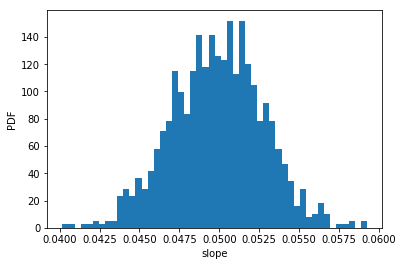

In [5]:
# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

## PLOT BOOTSTRAP REGRESSION

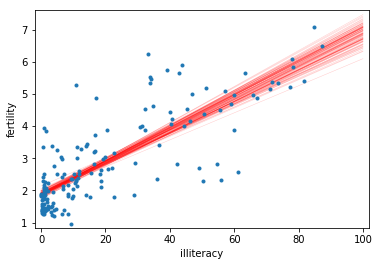

In [6]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker = ".", linestyle = "none")

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()